<a href="https://colab.research.google.com/github/Yenduri-Sai-Srikar/DATA-SCIENCE/blob/master/FoDS_CS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as pd
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier



In [ ]:
!pip install pdpbox

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/NithinNarayanan07/DataScience2/main/diabetes2.csv')
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.00000,207.593750,33.6,0.627,50.0,1
1,1,1,85.0,66.000000,29.00000,129.725191,26.6,0.351,31.0,0
2,2,8,183.0,69.224299,0.00000,207.593750,23.3,0.672,32.0,1
3,3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0
4,4,0,137.0,40.000000,20.43254,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...,...
736,763,10,101.0,76.000000,48.00000,180.000000,32.9,0.171,63.0,0
737,764,2,122.0,70.000000,27.00000,129.725191,36.8,0.340,27.0,0
738,765,5,121.0,72.000000,23.00000,112.000000,26.2,0.245,30.0,0
739,766,1,126.0,60.000000,0.00000,207.593750,30.1,0.349,47.0,1


In [32]:
def bmi(row):
    if row["BMI"] < 18.5:
        return "Low"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Perfect"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "High"
    elif row["BMI"] >= 30:
        return "Obese"

In [39]:
df = df.assign(BMI_pred=df.apply(bmi, axis=1))

In [40]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_pred,INSULIN_pred
0,0,6,148.0,72.000000,35.00000,207.593750,33.6,0.627,50.0,1,Obese,Unusual
1,1,1,85.0,66.000000,29.00000,129.725191,26.6,0.351,31.0,0,High,Usual
2,2,8,183.0,69.224299,0.00000,207.593750,23.3,0.672,32.0,1,Perfect,Unusual
3,3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0,High,Usual
4,4,0,137.0,40.000000,20.43254,168.000000,43.1,2.288,33.0,1,Obese,Unusual
...,...,...,...,...,...,...,...,...,...,...,...,...
736,763,10,101.0,76.000000,48.00000,180.000000,32.9,0.171,63.0,0,Obese,Unusual
737,764,2,122.0,70.000000,27.00000,129.725191,36.8,0.340,27.0,0,Obese,Usual
738,765,5,121.0,72.000000,23.00000,112.000000,26.2,0.245,30.0,0,High,Usual
739,766,1,126.0,60.000000,0.00000,207.593750,30.1,0.349,47.0,1,Obese,Unusual


In [35]:
def insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Usual"
    else:
        return "Unusual"

In [41]:
df = df.assign(INSULIN_pred=df.apply(insulin, axis=1))

In [42]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_pred,INSULIN_pred
0,0,6,148.0,72.000000,35.00000,207.593750,33.6,0.627,50.0,1,Obese,Unusual
1,1,1,85.0,66.000000,29.00000,129.725191,26.6,0.351,31.0,0,High,Usual
2,2,8,183.0,69.224299,0.00000,207.593750,23.3,0.672,32.0,1,Perfect,Unusual
3,3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21.0,0,High,Usual
4,4,0,137.0,40.000000,20.43254,168.000000,43.1,2.288,33.0,1,Obese,Unusual
...,...,...,...,...,...,...,...,...,...,...,...,...
736,763,10,101.0,76.000000,48.00000,180.000000,32.9,0.171,63.0,0,Obese,Unusual
737,764,2,122.0,70.000000,27.00000,129.725191,36.8,0.340,27.0,0,Obese,Usual
738,765,5,121.0,72.000000,23.00000,112.000000,26.2,0.245,30.0,0,High,Usual
739,766,1,126.0,60.000000,0.00000,207.593750,30.1,0.349,47.0,1,Obese,Unusual


No of patients with good Insulin Levels:  496
No of patients with bad  Insulin Levels:  245


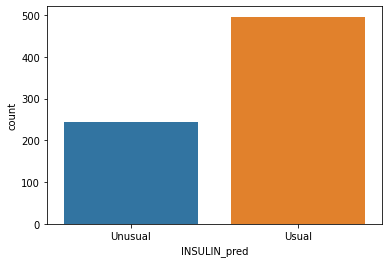

In [46]:
sns.countplot(data=df, x = 'INSULIN_pred', label='Count')
good,bad = df['INSULIN_pred'].value_counts()
print('No of patients with good Insulin Levels: ',good)
print('No of patients with bad  Insulin Levels: ',bad)


No of patients with low BMI:  14
No of patients with good BMI:  100
No of patients with high BMI:  172
No of patients with over BMI:  455


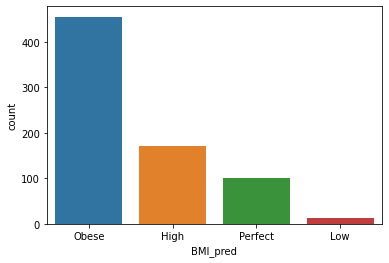

In [55]:
sns.countplot(data=df, x = 'BMI_pred', label='Count')

O,H,P,L = df['BMI_pred'].value_counts()
print('No of patients with low BMI: ',L)
print('No of patients with good BMI: ',P)
print('No of patients with high BMI: ',H)
print('No of patients with over BMI: ',O)

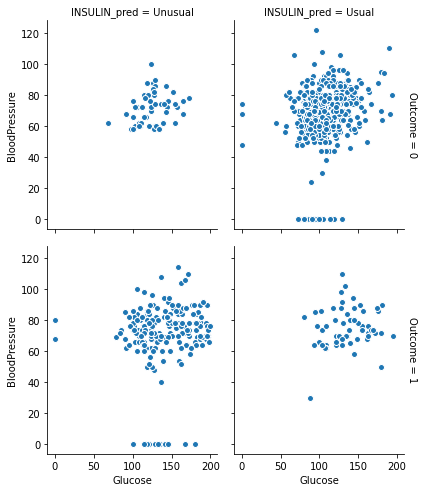

In [56]:
g = sns.FacetGrid(df, col="INSULIN_pred", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "BloodPressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

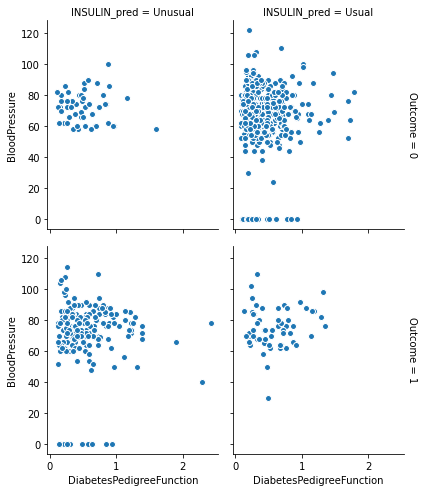

In [57]:
g = sns.FacetGrid(df, col="INSULIN_pred", row="Outcome", margin_titles=True)
g.map(plt.scatter,"DiabetesPedigreeFunction", "BloodPressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)

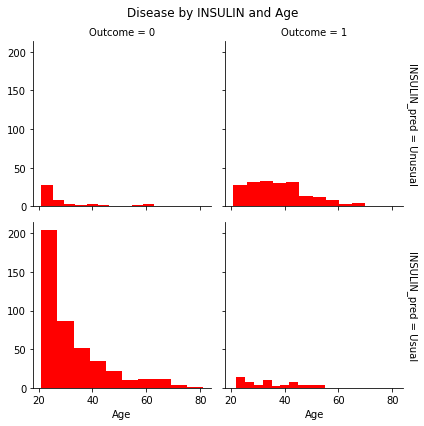

In [58]:
g = sns.FacetGrid(df, col="Outcome", row="INSULIN_pred", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by INSULIN and Age');

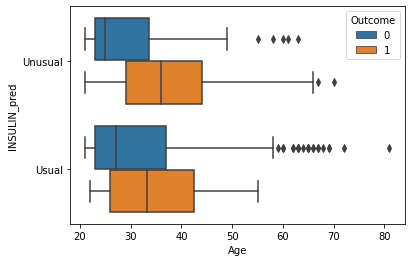

In [59]:
sns.boxplot(x="Age", y="INSULIN_pred", hue="Outcome", data=df);

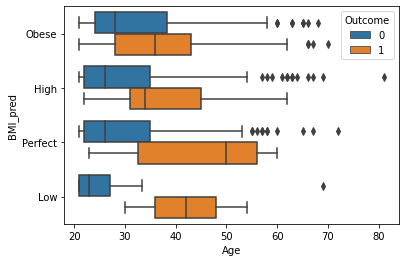

In [61]:
sns.boxplot(x="Age", y="BMI_pred", hue="Outcome", data=df);